In [1]:
import time
from cICA.functions import constrainedICA
from cICA.helpers import *

### Generate artificial signals, reference signals and signal mixtures.

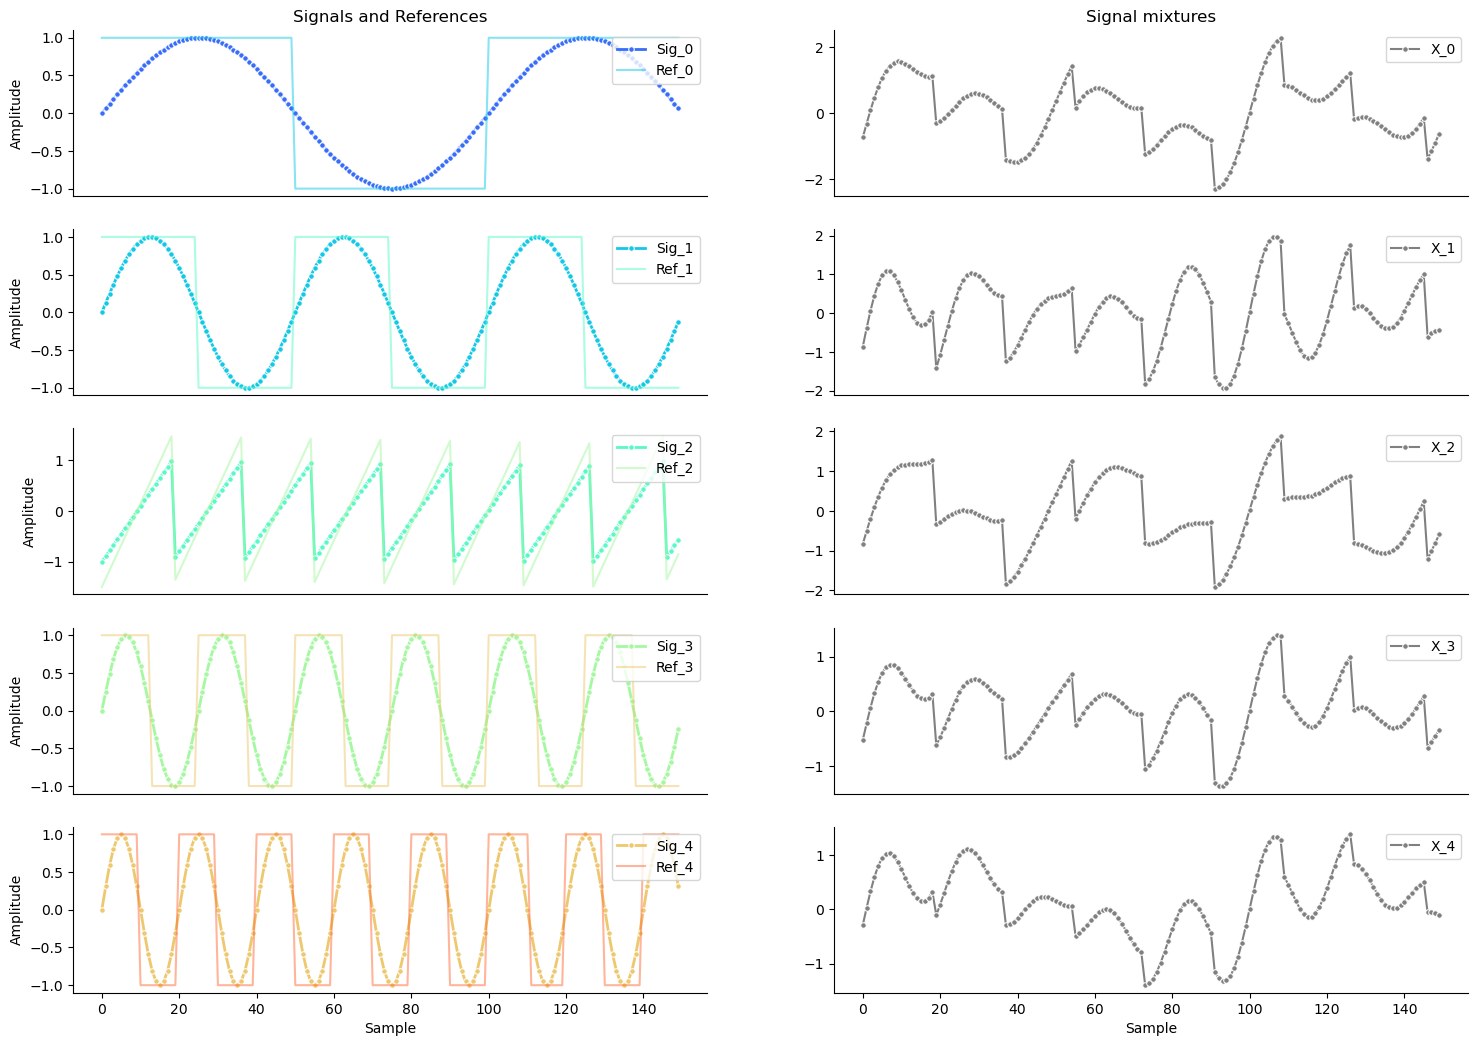

In [2]:
# Genrate signals.
Sigs, Refs, X = generate_artificial_signals(n_sig=5, n_samples=20000, save_signals=True)

# Plot signals.
plot_components(Sigs=Sigs, Refs=Refs, C=X, labels=['Sig', 'Ref', 'X'],
                titles=['Signals and References', 'Signal mixtures'],
                n_points=150)

### Run constrained ICA.

In [3]:
thres = 0.4  # Similarity threshold.
lr = 0.1  # Learning rate.
obj_func = 'negentr'  # Objective function for ICA, alternatives: 'infomax', 'ext_infomax'
gamma = 0.5  # Update step for constraint.
mu_init = 0  # Initial Lagrange parameter.
stop_crit = 1e-8  # Stop criterion.
max_iter = 10000  # Maximum number of iterations.
verbose = 100  # Print every...
n_pca_comp = None  # If not None, runs PCA dimension reduction prior to ICA.
n_ica_comp = 5  # Number of estimated signals.
constraint = True  # Use similarity constraint.
annealing_lr = 3000  # Decrease lr every...

cICA = constrainedICA(thres=thres, lr=lr, mu_init=mu_init, 
                      gamma=gamma, stop_crit=stop_crit,
                      verbose=verbose, max_iter=max_iter,
                      constraint=constraint, n_pca_comp=n_pca_comp,
                      n_ica_comp=n_ica_comp, obj_func=obj_func,
                      annealing_lr=annealing_lr, whiten=True, 
                      zscore_Refs=True)

start_time = time.time()

Y, W, history = cICA.fit_transform(X, Refs)

end_time = time.time()
print('Finished after: {:.3f}s.'.format(end_time - start_time))

Apply PCA with n_pca_comp: None, whiten: True.

Apply ICA with n_ica_comp: 5, n_refs: 5.

Iteration #00100: Change W: 0.00000057 
  Lag. mult.: [0. 0. 0. 0. 0.] 
  Similarity: [0.9112 0.899  0.9999 0.8991 0.8895] 
  Negentropy: [0.0308 0.0357 0.0259 0.0396 0.0329] 
  Kurtosis:  [-1.4801 -1.4998 -1.1996 -1.4957 -1.4775] 

Iteration #00200: Change W: 0.00000002 
  Lag. mult.: [0. 0. 0. 0. 0.] 
  Similarity: [0.9061 0.8991 1.     0.8997 0.8922] 
  Negentropy: [0.0369 0.0402 0.0269 0.0381 0.0373] 
  Kurtosis:  [-1.4956 -1.5    -1.1998 -1.4998 -1.4955] 

Converged at iteration: #00214.
Iteration #00214: Change W: 0.00000001 
  Lag. mult.: [0. 0. 0. 0. 0.] 
  Similarity: [0.9058 0.8991 1.     0.8998 0.8923] 
  Negentropy: [0.0332 0.0353 0.0329 0.0307 0.0338] 
  Kurtosis:  [-1.4961 -1.5    -1.1998 -1.4999 -1.496 ] 

Finished after: 5.544s.


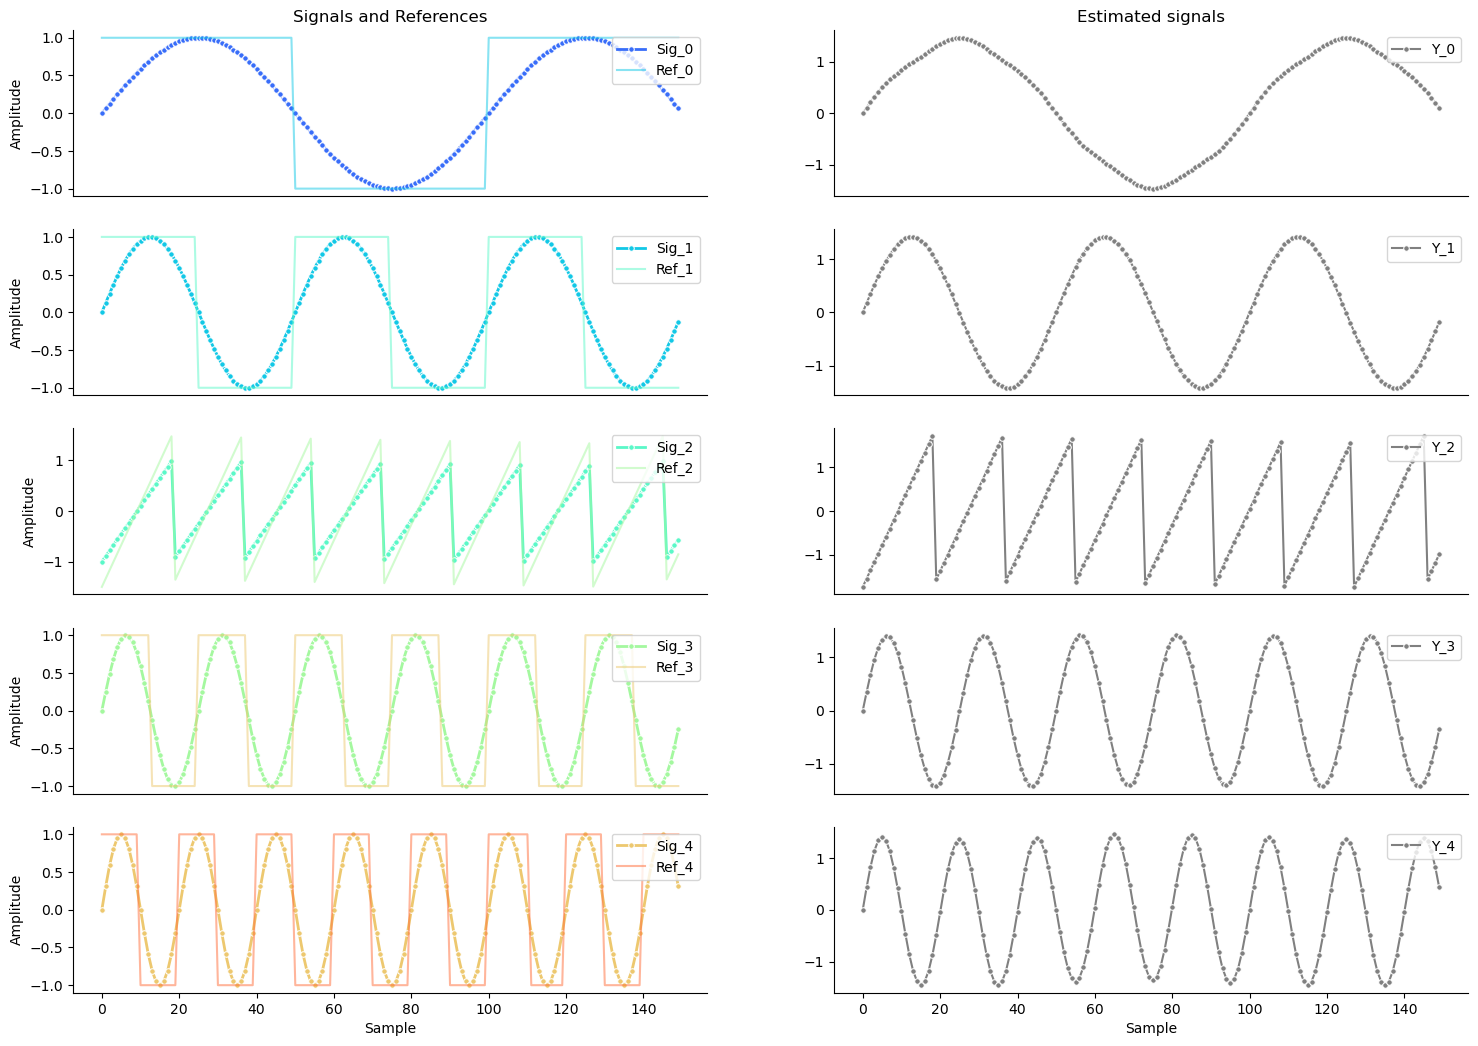

In [4]:
# Plot the original signals and estimated signals Y.
plot_components(Sigs=Sigs, Refs=Refs, C=Y, labels=['Sig', 'Ref', 'Y'],
                titles=['Signals and References', 'Estimated signals'], 
                n_points=150)

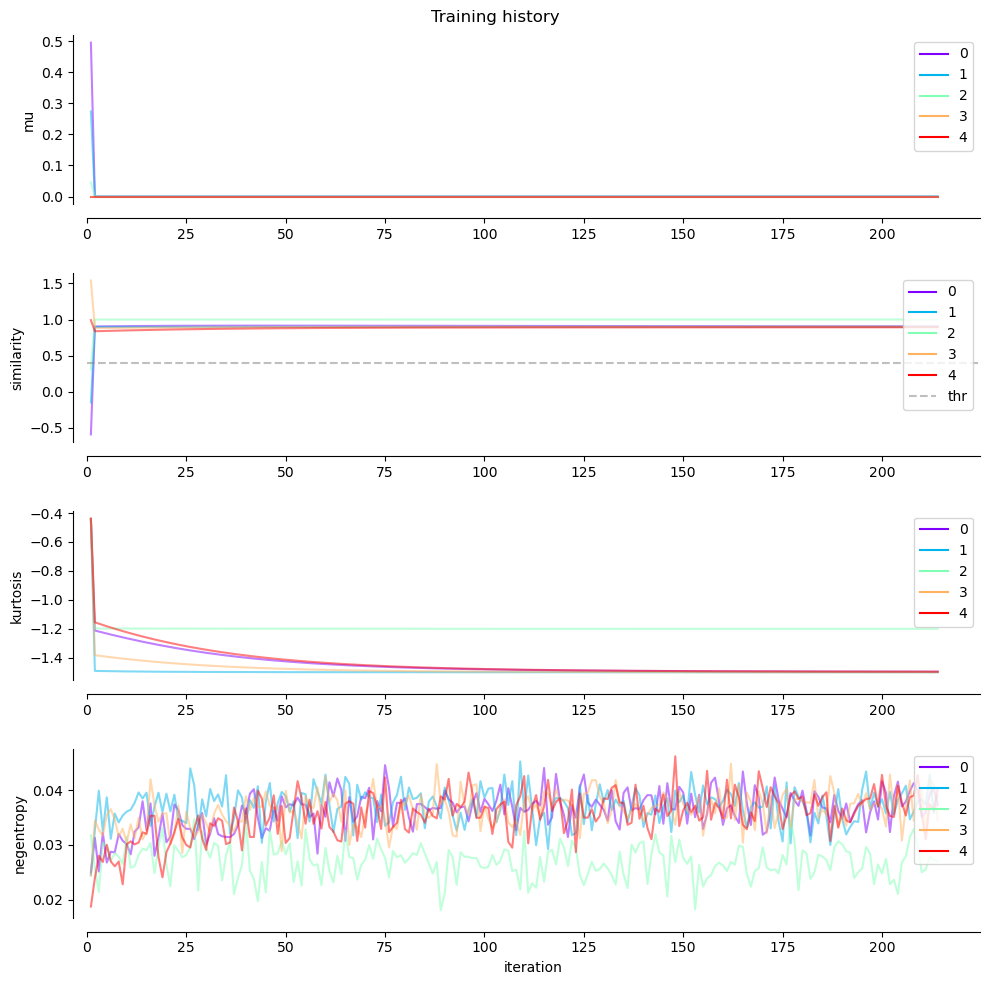

In [5]:
# Plot the training history.
plot_history(history, xlim=None, thres=thres)

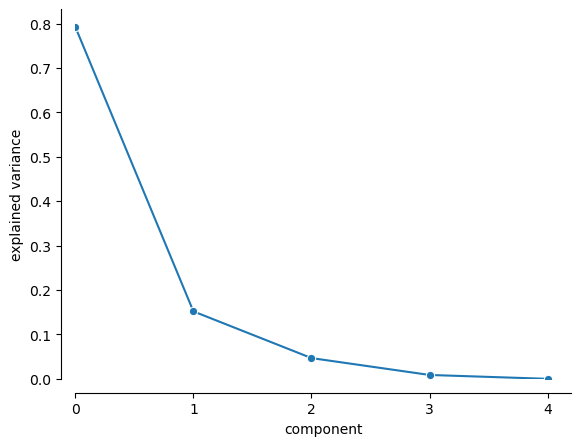

In [6]:
# Plot explained variance per principal component.
plot_pca_variance(cICA.pca.explained_variance_ratio_)